In  Workshop 3 you looked specifically at lexical diversity in lyrics.  
Now  with songs from two different artists or genres of your choice use the tools that you have been introduced to during the module to analyse a selection of their songs and identify similarities and differences in the style of language used.  
Do the artists or genres have defining features and would these defining features allow you to correctly guess an unseen song?  
Discuss a context where this approach to the analysis of language could apply to some other task related to your own academic background.  
What might you need to add or change to better address the task in your domain?  
Use examples to support your answer.  
You may also use other resources as long as these are cited appropriately.  

## Gather data

In [16]:
import nltk
from bs4 import BeautifulSoup
import requests
import re
from pathlib import Path

def get_songs(artistid, start_song_num = 1, song_dir = "songs"):
    song_dir = Path(song_dir)
    url = f"https://genius.p.rapidapi.com/artists/{artistid}/songs"

    headers = {
        'x-rapidapi-host': "genius.p.rapidapi.com",
        'x-rapidapi-key': "8c62b01aa3msh79ca17d82d4e5dep1a3ddejsn9346cf9aa3cb"
    }

    stepsize = 50
    page = int((start_song_num + stepsize)/stepsize)
    
    print(f"==>Retrieving songs for Artist ID {artistid}. Songs will be stored in `{song_dir}'")
    response = requests.request("GET", url, headers=headers, params={"sort":"title","per_page":str(stepsize),"page":str(page)})
    song_page = response.json()['response']['songs']
    songs = song_page
    while response.json()['response']['next_page']:
        response = requests.request("GET", url, headers=headers, params={"sort":"title","per_page":str(stepsize),"page":str(page)})
        song_page = response.json()['response']['songs']
        songs.extend(song_page)
        page = response.json()['response']['next_page']
    print(f"==>Retrieved {len(songs)} songs")
    print(f"====>Writing songs to file unless they already exist as a lyrics file.<====")
    nwritten = 0
    for s in songs:
        if s['primary_artist']['id'] == artistid and s['lyrics_state'] == 'complete':
            print(f"==>SONG: {s['title']} / {s['url']} <==")
            path = song_dir.joinpath(f"{s['primary_artist']['name']}_{s['title'].replace('/','')}.song")
            if not path.is_file():
                soup = BeautifulSoup(requests.get(s['url']).content, 'html.parser')
                lyrics_tag = soup.find('div', class_='lyrics')
                if lyrics_tag is not None:
                    lyrics = lyrics_tag.get_text()
                    print(f">WRITING LYRICS [ {s['primary_artist']['name']} / {s['title']} ] to `{path}'")
                    f = open(path, "w")
                    f.write(lyrics)
                    f.close()
                    nwritten = nwritten+1
            else:
                print(f">Found {path}")
    print(f"====>Finished writing songs to files. Wrote {nwritten} songs.<====\n")
    return songs

In [17]:
jcsongs = get_songs(1167)
kcsongs = get_songs(14986)

==>Retrieving songs for Artist ID 1167. Songs will be stored in `songs'
==>Retrieved 1215 songs
====>Writing songs to file unless they already exist as a lyrics file.<====
==>SONG: 1 Corinthians 15:55 / https://genius.com/Johnny-cash-1-corinthians-15-55-lyrics <==
>Found songs/Johnny Cash_1 Corinthians 15:55.song
==>SONG: 25 Minutes to Go / https://genius.com/Johnny-cash-25-minutes-to-go-lyrics <==
>Found songs/Johnny Cash_25 Minutes to Go.song
==>SONG: 25 Minutes to Go (2012) / https://genius.com/Johnny-cash-25-minutes-to-go-2012-lyrics <==
>Found songs/Johnny Cash_25 Minutes to Go (2012).song
==>SONG: 40 Shades of Green / https://genius.com/Johnny-cash-40-shades-of-green-lyrics <==
>Found songs/Johnny Cash_40 Shades of Green.song
==>SONG: Abner Brown / https://genius.com/Johnny-cash-abner-brown-lyrics <==
>Found songs/Johnny Cash_Abner Brown.song
==>SONG: A Boy Named Sue / https://genius.com/Johnny-cash-a-boy-named-sue-lyrics <==
>Found songs/Johnny Cash_A Boy Named Sue.song
==>SONG:

>Found songs/Johnny Cash_Nazarene.song
==>SONG: Ned Kelly / https://genius.com/Johnny-cash-ned-kelly-lyrics <==
>Found songs/Johnny Cash_Ned Kelly.song
==>SONG: Never Grow Old / https://genius.com/Johnny-cash-never-grow-old-lyrics <==
>Found songs/Johnny Cash_Never Grow Old.song
==>SONG: New Cut Road / https://genius.com/Johnny-cash-new-cut-road-lyrics <==
>Found songs/Johnny Cash_New Cut Road.song
==>SONG: New Mexico / https://genius.com/Johnny-cash-new-mexico-lyrics <==
>Found songs/Johnny Cash_New Mexico.song
==>SONG: New Moon Over Jamaica / https://genius.com/Johnny-cash-new-moon-over-jamaica-lyrics <==
>Found songs/Johnny Cash_New Moon Over Jamaica.song
==>SONG: Next in Line / https://genius.com/Johnny-cash-next-in-line-lyrics <==
>Found songs/Johnny Cash_Next in Line.song
==>SONG: Nine Pound Hammer / https://genius.com/Johnny-cash-nine-pound-hammer-lyrics <==
>Found songs/Johnny Cash_Nine Pound Hammer.song
==>SONG: Nobody / https://genius.com/Johnny-cash-nobody-lyrics <==
>Found 

==>Retrieved 214 songs
====>Writing songs to file unless they already exist as a lyrics file.<====
==>SONG: 21st Century Schizoid Man / https://genius.com/King-crimson-21st-century-schizoid-man-lyrics <==
>Found songs/King Crimson_21st Century Schizoid Man.song
==>SONG: 21st Century Schizoid Man (BBC session) / https://genius.com/King-crimson-21st-century-schizoid-man-bbc-session-lyrics <==
>Found songs/King Crimson_21st Century Schizoid Man (BBC session).song
==>SONG: 21st Century Schizoid Man - Commentary / https://genius.com/King-crimson-21st-century-schizoid-man-commentary-lyrics <==
>Found songs/King Crimson_21st Century Schizoid Man - Commentary.song
==>SONG: 21st Century Schizoid Man (Fillmore East) / https://genius.com/King-crimson-21st-century-schizoid-man-fillmore-east-lyrics <==
>Found songs/King Crimson_21st Century Schizoid Man (Fillmore East).song
==>SONG: 21st Century Schizoid Man (Hyde Park) / https://genius.com/King-crimson-21st-century-schizoid-man-hyde-park-lyrics <=

In [100]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(["verse","chorus","instrumental","1","2","3"])
punctuation = [",",".",";","'","-","I","\"","!","--",".\"","?","'s", "''", "..."]

class Song(object):    
    def __init__(self, title, artist):
        self._title = title
        self._artist = artist
        path = self.filename_fmt(self._artist, self._title)
        print(f"SONG: {self._title} / {self._artist} / {path}")
        self._file = open(path, "r")
        self.words = nltk.word_tokenize(self._file.read())
            
    @classmethod
    def from_file(cls, filename):
        m = re.match(r"([^_]+)(?:_)([^_]+)(?:\.song)", filename)
        g = m.groups()
        return cls(g[1], g[0])
        
    def filtered(self): # Fadhbanna le m.s. ``don't``, ``can't``, gearrtearmaí eile
        return [t.lower() for t in self.words if t.isalnum() and (t.lower() not in stop_words) and (t not in punctuation)]
    
    def freq_dist(self):
        return nltk.FreqDist(self.filtered())
    
    @staticmethod
    def filename_fmt(artist, title = None,):
        titlestr = str(title) if title is not None else "*"
        return Path(f"{artist}_{titlestr}.song")
    
class Artist(object):
    def __init__(self, name, song_dir = 'songs'):
        self.name = name
        p = Path(song_dir)
        self.songs = [Song.from_file(str(n)) for n in p.glob(str(Song.filename_fmt(self.name)))]

In [101]:
artists = ["King Crimson", "Johnny Cash"]
aa = [Artist(a) for a in artists]

SONG: Free as a Bird / songs/King Crimson / songs/King Crimson_Free as a Bird.song
SONG: Walk On...No Pussyfooting / songs/King Crimson / songs/King Crimson_Walk On...No Pussyfooting.song
SONG: Exiles / songs/King Crimson / songs/King Crimson_Exiles.song
SONG: The Power to Believe III / songs/King Crimson / songs/King Crimson_The Power to Believe III.song
SONG: Larks’ Tongues in Aspic, Pt. 4 / songs/King Crimson / songs/King Crimson_Larks’ Tongues in Aspic, Pt. 4.song
SONG: Walk On - Monk Morph Music of the Chamber / songs/King Crimson / songs/King Crimson_Walk On - Monk Morph Music of the Chamber.song
SONG: The Sheltering Sky / songs/King Crimson / songs/King Crimson_The Sheltering Sky.song
SONG: Happy Family / songs/King Crimson / songs/King Crimson_Happy Family.song
SONG: Meltdown / songs/King Crimson / songs/King Crimson_Meltdown.song
SONG: Lady of the Dancing Water / songs/King Crimson / songs/King Crimson_Lady of the Dancing Water.song
SONG: The King Crimson Barber Shop / songs/K

SONG: Neal and Jack and Me / songs/King Crimson / songs/King Crimson_Neal and Jack and Me.song
SONG: Inner Garden II / songs/King Crimson / songs/King Crimson_Inner Garden II.song
SONG: Drink To Me Only With Thine Eyes / songs/Johnny Cash / songs/Johnny Cash_Drink To Me Only With Thine Eyes.song
SONG: Ancient History / songs/Johnny Cash / songs/Johnny Cash_Ancient History.song
SONG: Cool Water / songs/Johnny Cash / songs/Johnny Cash_Cool Water.song
SONG: The Fable of Willie Brown / songs/Johnny Cash / songs/Johnny Cash_The Fable of Willie Brown.song
SONG: City Jail / songs/Johnny Cash / songs/Johnny Cash_City Jail.song
SONG: Old Apache Squaw / songs/Johnny Cash / songs/Johnny Cash_Old Apache Squaw.song
SONG: When he comes / songs/Johnny Cash / songs/Johnny Cash_When he comes.song
SONG: The Sound Of Laughter / songs/Johnny Cash / songs/Johnny Cash_The Sound Of Laughter.song
SONG: Devil’s Right Hand / songs/Johnny Cash / songs/Johnny Cash_Devil’s Right Hand.song
SONG: Take Me Home / song

SONG: Even Cowgirls Get The Blues / songs/Johnny Cash / songs/Johnny Cash_Even Cowgirls Get The Blues.song
SONG: Thunderball / songs/Johnny Cash / songs/Johnny Cash_Thunderball.song
SONG: Reverend Mr. Black / songs/Johnny Cash / songs/Johnny Cash_Reverend Mr. Black.song
SONG: Katy Too / songs/Johnny Cash / songs/Johnny Cash_Katy Too.song
SONG: Rowboat / songs/Johnny Cash / songs/Johnny Cash_Rowboat.song
SONG: 25 Minutes to Go / songs/Johnny Cash / songs/Johnny Cash_25 Minutes to Go.song
SONG: I’ll be home for christmas / songs/Johnny Cash / songs/Johnny Cash_I’ll be home for christmas.song
SONG: Dark As the Dungeon / songs/Johnny Cash / songs/Johnny Cash_Dark As the Dungeon.song
SONG: Love Has Lost Again / songs/Johnny Cash / songs/Johnny Cash_Love Has Lost Again.song
SONG: Daughter Of A Railroad Man / songs/Johnny Cash / songs/Johnny Cash_Daughter Of A Railroad Man.song
SONG: Kate / songs/Johnny Cash / songs/Johnny Cash_Kate.song
SONG: I’m An Easy Rider / songs/Johnny Cash / songs/Joh

SONG: Spiritual / songs/Johnny Cash / songs/Johnny Cash_Spiritual.song
SONG: Ned Kelly / songs/Johnny Cash / songs/Johnny Cash_Ned Kelly.song
SONG: Pick the Wildwood Flower / songs/Johnny Cash / songs/Johnny Cash_Pick the Wildwood Flower.song
SONG: Song to mama / songs/Johnny Cash / songs/Johnny Cash_Song to mama.song
SONG: The Junkie’s Prayer / songs/Johnny Cash / songs/Johnny Cash_The Junkie’s Prayer.song
SONG: In Them Old Cottonfields Back Home / songs/Johnny Cash / songs/Johnny Cash_In Them Old Cottonfields Back Home.song
SONG: Would You Recognize Jesus / songs/Johnny Cash / songs/Johnny Cash_Would You Recognize Jesus.song
SONG: I Shall Not Be Moved / songs/Johnny Cash / songs/Johnny Cash_I Shall Not Be Moved.song
SONG: Bridge over Troubled Water / songs/Johnny Cash / songs/Johnny Cash_Bridge over Troubled Water.song
SONG: Busted (Live) / songs/Johnny Cash / songs/Johnny Cash_Busted (Live).song
SONG: Love Is the Way / songs/Johnny Cash / songs/Johnny Cash_Love Is the Way.song
SONG:

SONG: Amazing Grace / songs/Johnny Cash / songs/Johnny Cash_Amazing Grace.song
SONG: Greatest Love Affair / songs/Johnny Cash / songs/Johnny Cash_Greatest Love Affair.song
SONG: A Satisfied Mind / songs/Johnny Cash / songs/Johnny Cash_A Satisfied Mind.song
SONG: I Promise You / songs/Johnny Cash / songs/Johnny Cash_I Promise You.song
SONG: Locomotive Man / songs/Johnny Cash / songs/Johnny Cash_Locomotive Man.song
SONG: I’d Rather Die Young / songs/Johnny Cash / songs/Johnny Cash_I’d Rather Die Young.song
SONG: Mr. Garfield / songs/Johnny Cash / songs/Johnny Cash_Mr. Garfield.song
SONG: Good Old American Guest / songs/Johnny Cash / songs/Johnny Cash_Good Old American Guest.song
SONG: I Just Don’t Care Enough (To Carry On) / songs/Johnny Cash / songs/Johnny Cash_I Just Don’t Care Enough (To Carry On).song
SONG: All Over Again / songs/Johnny Cash / songs/Johnny Cash_All Over Again.song
SONG: These Are My People / songs/Johnny Cash / songs/Johnny Cash_These Are My People.song
SONG: That’s 

SONG: The Shifting Whispering Sands, Part I / songs/Johnny Cash / songs/Johnny Cash_The Shifting Whispering Sands, Part I.song
SONG: Easy Street / songs/Johnny Cash / songs/Johnny Cash_Easy Street.song
SONG: There’s A Bear In The Woods / songs/Johnny Cash / songs/Johnny Cash_There’s A Bear In The Woods.song
SONG: Rockin’ my life away / songs/Johnny Cash / songs/Johnny Cash_Rockin’ my life away.song
SONG: Arkansas Lovin’ Man / songs/Johnny Cash / songs/Johnny Cash_Arkansas Lovin’ Man.song
SONG: Ballad of the Ark / songs/Johnny Cash / songs/Johnny Cash_Ballad of the Ark.song
SONG: Home of the Blues / songs/Johnny Cash / songs/Johnny Cash_Home of the Blues.song
SONG: Big Iron / songs/Johnny Cash / songs/Johnny Cash_Big Iron.song
SONG: Chain Gang / songs/Johnny Cash / songs/Johnny Cash_Chain Gang.song
SONG: Snow in His Hair / songs/Johnny Cash / songs/Johnny Cash_Snow in His Hair.song
SONG: On Wheels And Wings / songs/Johnny Cash / songs/Johnny Cash_On Wheels And Wings.song
SONG: I Forgot 

SONG: I Wish I Was Crazy Again / songs/Johnny Cash / songs/Johnny Cash_I Wish I Was Crazy Again.song
SONG: Oney / songs/Johnny Cash / songs/Johnny Cash_Oney.song
SONG: Who Kept The Sheep / songs/Johnny Cash / songs/Johnny Cash_Who Kept The Sheep.song
SONG: Bird on a Wire (Live with Orchestra) / songs/Johnny Cash / songs/Johnny Cash_Bird on a Wire (Live with Orchestra).song
SONG: Lumberjack / songs/Johnny Cash / songs/Johnny Cash_Lumberjack.song
SONG: Wings in the morning / songs/Johnny Cash / songs/Johnny Cash_Wings in the morning.song
SONG: All of God’s Children Ain’t Free / songs/Johnny Cash / songs/Johnny Cash_All of God’s Children Ain’t Free.song
SONG: Down the Line / songs/Johnny Cash / songs/Johnny Cash_Down the Line.song
SONG: My Old Kentucky Home (Turpentine and Dandelion Wine) / songs/Johnny Cash / songs/Johnny Cash_My Old Kentucky Home (Turpentine and Dandelion Wine).song
SONG: How Great Thou Art / songs/Johnny Cash / songs/Johnny Cash_How Great Thou Art.song
SONG: Rock of Ag

SONG: Hammers And Nails / songs/Johnny Cash / songs/Johnny Cash_Hammers And Nails.song
SONG: Love Me Like You Used To / songs/Johnny Cash / songs/Johnny Cash_Love Me Like You Used To.song
SONG: Port of Lonely Hearts / songs/Johnny Cash / songs/Johnny Cash_Port of Lonely Hearts.song
SONG: Call Your Mother / songs/Johnny Cash / songs/Johnny Cash_Call Your Mother.song
SONG: The Last Time / songs/Johnny Cash / songs/Johnny Cash_The Last Time.song
SONG: Wabash Blues / songs/Johnny Cash / songs/Johnny Cash_Wabash Blues.song
SONG: If I Had A Hammer / songs/Johnny Cash / songs/Johnny Cash_If I Had A Hammer.song
SONG: A Wednesday Car / songs/Johnny Cash / songs/Johnny Cash_A Wednesday Car.song
SONG: Country Boy (Unchained version) / songs/Johnny Cash / songs/Johnny Cash_Country Boy (Unchained version).song
SONG: Second Honeymoon / songs/Johnny Cash / songs/Johnny Cash_Second Honeymoon.song
SONG: You’ve Got a New Light Shining in Your Eyes / songs/Johnny Cash / songs/Johnny Cash_You’ve Got a New

SONG: Sugartime (Kennedy remix) / songs/Johnny Cash / songs/Johnny Cash_Sugartime (Kennedy remix).song
SONG: A Letter From Home / songs/Johnny Cash / songs/Johnny Cash_A Letter From Home.song
SONG: After All / songs/Johnny Cash / songs/Johnny Cash_After All.song
SONG: Our Guide Jacob At Mount Tabor / songs/Johnny Cash / songs/Johnny Cash_Our Guide Jacob At Mount Tabor.song
SONG: Austin Prison / songs/Johnny Cash / songs/Johnny Cash_Austin Prison.song
SONG: Never Grow Old / songs/Johnny Cash / songs/Johnny Cash_Never Grow Old.song
SONG: The Big Battle / songs/Johnny Cash / songs/Johnny Cash_The Big Battle.song
SONG: The Vanishing Race / songs/Johnny Cash / songs/Johnny Cash_The Vanishing Race.song
SONG: No Charge / songs/Johnny Cash / songs/Johnny Cash_No Charge.song
SONG: Darlin’ Companion / songs/Johnny Cash / songs/Johnny Cash_Darlin’ Companion.song
SONG: I’m a newborn man / songs/Johnny Cash / songs/Johnny Cash_I’m a newborn man.song
SONG: You Remembered Me / songs/Johnny Cash / son

SONG: Adios Aloha / songs/Johnny Cash / songs/Johnny Cash_Adios Aloha.song
SONG: Dear Mrs / songs/Johnny Cash / songs/Johnny Cash_Dear Mrs.song
SONG: You Can’t Beat Jesus Christ / songs/Johnny Cash / songs/Johnny Cash_You Can’t Beat Jesus Christ.song
SONG: Five Minutes To Live / songs/Johnny Cash / songs/Johnny Cash_Five Minutes To Live.song
SONG: Paul Revere / songs/Johnny Cash / songs/Johnny Cash_Paul Revere.song
SONG: That’s What It’s Like To Be Lonesome / songs/Johnny Cash / songs/Johnny Cash_That’s What It’s Like To Be Lonesome.song
SONG: Mama’s Baby / songs/Johnny Cash / songs/Johnny Cash_Mama’s Baby.song
SONG: (DUPE) / songs/Johnny Cash / songs/Johnny Cash_(DUPE).song
SONG: Louisiana Man / songs/Johnny Cash / songs/Johnny Cash_Louisiana Man.song
SONG: Lately / songs/Johnny Cash / songs/Johnny Cash_Lately.song
SONG: Too Little Too Late / songs/Johnny Cash / songs/Johnny Cash_Too Little Too Late.song
SONG: If I Were a Carpenter / songs/Johnny Cash / songs/Johnny Cash_If I Were a C

## Identify similarities and differences in the style of language used

### Entire bodies of work

#### Generate aggregated bodies of work

In [78]:
artist_bow = [None] * len(aa)
for i,a in enumerate(aa):
    words = []
    for s in a.songs:
        words.extend(s.filtered())
    artist_bow[i] = words

#### Frequency Distribution

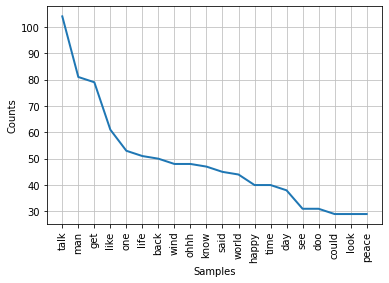

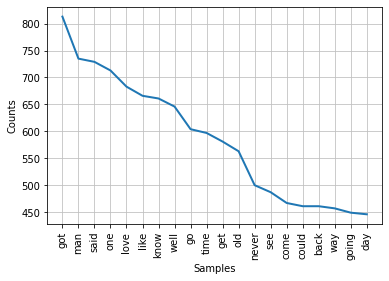

In [79]:
[nltk.FreqDist(stem).plot(20) for stem in artist_bow]

#### Stemmer

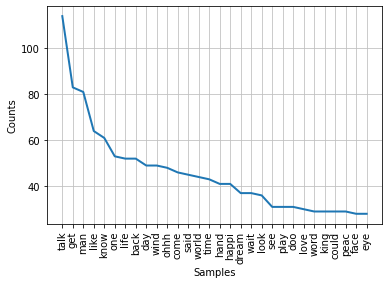

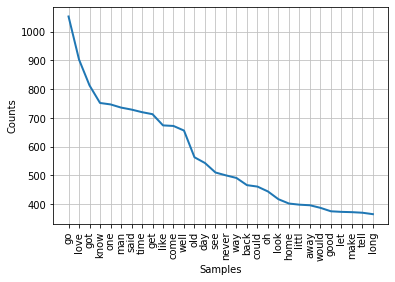

In [90]:
porter = nltk.PorterStemmer()
artist_bow_stem = [[porter.stem(w) for w in bow] for bow in artist_bow]
[nltk.FreqDist(stem).plot(30) for stem in artist_bow_stem]

#### Lexical diversity

In [68]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [73]:
for art,bow in zip(artists, artist_bow):
    print(f"LEXICAL DIVERSITY OF {art}: {lexical_diversity(bow)}")

LEXICAL DIVERSITY OF King Crimson: 0.27953694245829075
LEXICAL DIVERSITY OF Johnny Cash: 0.08775981524249422


### More granular

#### Frequency distribution

In [93]:
porter = nltk.PorterStemmer()
afds_stem = [[nltk.FreqDist([porter.stem(w) for w in song.filtered()]) for song in a.songs] for a in aa] #  Artists' words frequency distributions after stemming
afds = [[nltk.FreqDist(song.filtered()) for song in a.songs] for a in aa] #  Artists' words frequency distributions

In [89]:
for fd in 

[[FreqDist({'bird': 12, 'free': 10, 'home': 6, 'next': 3, 'best': 3, 'thing': 3, 'ah': 3, 'dri': 2, 'like': 2, 'fli': 2, ...}),
  FreqDist({}),
  FreqDist({'air': 2, 'though': 2, 'faraway': 1, 'land': 1, 'strang': 1, 'palm': 1, 'hand': 1, 'damp': 1, 'expect': 1, 'spring': 1, ...}),
  FreqDist({'carri': 1, 'save': 1, 'life': 1}),
  FreqDist({}),
  FreqDist({}),
  FreqDist({}),
  FreqDist({'happi': 5, 'famili': 5, 'one': 3, 'hand': 3, 'clap': 3, 'four': 3, 'went': 3, 'none': 3, 'back': 3, 'rufu': 3, ...}),
  FreqDist({'meltdown': 8, 'drown': 4, 'word': 4, 'without': 4, 'watch': 3, 'come': 3, 'bear': 3, 'sound': 3, 'see': 3, 'kingdom': 3, ...}),
  FreqDist({'refrain': 3, 'ladi': 3, 'danc': 3, 'water': 3, 'eye': 2, 'glow': 2, 'grass': 1, 'hair': 1, 'stretch': 1, 'like': 1, ...}),
  FreqDist({'king': 7, 'crimson': 7, 'band': 7, 'play': 2, 'oh': 2, 'know': 2, 'land': 2, 'toni': 1, 'billi': 1, 'bobbi': 1, ...}),
  FreqDist({'readi': 6, 'wan': 4, 'na': 4, 'ride': 4, 'leav': 2, 'away': 2, 'die'

#### Lexical diversity

In [102]:
lexdiv = [[lexical_diversity(song.filtered()) for song in a.songs if len(song.filtered()) > 0] for a in aa]
lexdiv_stem = [[lexical_diversity([porter.stem(w) for w in song.filtered()]) for song in a.songs if len(song.filtered()) > 0] for a in aa]

In [118]:
import statistics as stats
print(f"====>Lexical diversity stats<====")
for a,llex in zip(aa,lexdiv_stem):
    print(f"==>ARTIST: {a.name}")
    print(f">MEAN     {stats.mean(llex)}")
    print(f">SD       {stats.stdev(llex)}")
    print(f">VARIANCE {stats.variance(llex)}")
    print(f">MEDIAN   {stats.median(llex)}")
    print(f">MIN      {min(llex)}")

====>Lexical diversity stats<====
==>ARTIST: King Crimson
>MEAN     0.7250414949870088
>SD       0.21159505319751798
>VARIANCE 0.04477246653766046
>MEDIAN   0.7553956834532374
>MIN      0.24
==>ARTIST: Johnny Cash
>MEAN     0.6580141623262034
>SD       0.14278595734025246
>VARIANCE 0.02038782961357239
>MEDIAN   0.6724137931034483
>MIN      0.2


In [ ]:
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words.extend(["get"])
punctuation = [",",".",";","'","-","I","\"","!","--",".\"","?","'s", "''", "..."]
from bs4 import BeautifulSoup
import requests
import re

from abc import ABC, abstractmethod

artist_names = ["King Crimson", "Cash"]

class LyricsURL(ABC):
    
    @abstractmethod
    def artist(self, name):
        pass
    
    @abstractmethod
    def song(self, title):
        pass

class AZLyricsURL(LyricsURL):
    def __init__(self):
        self.__base = "https://www.azlyrics.com"
        super().__init__()
    
    def artist(self, name):
        name = self.fmt(name)
        return "".join(f"{self.__base}/{name[0]}/{name}.html")
    
    def song(self, artist, title):
        artist = self.fmt(artist)
        title = self.fmt(title)
        return "".join(f"{self.__base}/lyrics/{artist}/{title}.html")
    
    def fmt(self, s):
        return "".join([c.lower() for c in s if c.isalnum()])

import requests

url = "https://genius.p.rapidapi.com/artists/14986/songs"

headers = {
    'x-rapidapi-host': "genius.p.rapidapi.com",
    'x-rapidapi-key': "8c62b01aa3msh79ca17d82d4e5dep1a3ddejsn9346cf9aa3cb"
    }

stepsize = 50
page = 1

response = requests.request("GET", url, headers=headers, params={"sort":"title","per_page":str(stepsize),"page":str(page)})
song_page = response.json()['response']['songs']
songs = song_page
while len(song_page) == stepsize:
    response = requests.request("GET", url, headers=headers, params={"sort":"title","per_page":str(stepsize),"page":str(page)})
    song_page = response.json()['response']['songs']
    songs.extend(song_page)
    page = page+1
print(f"Retrieved {len(songs)} songs")

for i in songs:
    if i['primary_artist']['id'] == 14986 and i['lyrics_state'] == 'complete':
        print(f"SONG: {i['title']} / {i['url']}")
for s in songs:
    if s['primary_artist']['name'] == 'King Crimson':
        path = Path(f"{s['primary_artist']['name']}_{s['title'].replace('/','')}.song")
        if not path.is_file():
            print(f"WRITING LYRICS [ {s['primary_artist']['name']} / {s['title']} ] to `{path}'")

            soup = BeautifulSoup(requests.get(s['url']).content, 'html.parser')
            lyrics_tag = soup.find('div', class_='lyrics')
            if lyrics_tag is not None:
                lyrics = lyrics_tag.get_text()

                f = open(path, "w")
                f.write(lyrics)
                f.close()